<a href="https://colab.research.google.com/github/steveAzo/ccmt-pynb/blob/main/CCMT_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stephenazongo","key":"d3d35995f26d541225bbd9dfa4154c86"}'}

In [ ]:
!pip install kagglehub

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stephenazongo/ghana-crop-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.87G/7.87G [01:25<00:00, 98.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1


In [ ]:
import os
import shutil

# Base dataset path
dataset_path = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

# Fix Cassava train set
cassava_train_path = os.path.join(dataset_path, 'Cassava', 'train_set')
source_folder = os.path.join(cassava_train_path, 'bacterial blight3241')
target_folder = os.path.join(cassava_train_path, 'bacterial blight')

if os.path.exists(source_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Move all images from bacterial blight3241 to bacterial blight
    for file_name in os.listdir(source_folder):
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(target_folder, file_name)
        if os.path.isfile(source_file):
            # Skip if file already exists in target to avoid overwriting
            if not os.path.exists(target_file):
                shutil.move(source_file, target_file)
            else:
                print(f"Skipping duplicate file: {file_name}")

    # Remove empty bacterial blight3241 folder
    if not os.listdir(source_folder):
        os.rmdir(source_folder)
        print("Removed empty folder: bacterial blight3241")
    else:
        print("Warning: bacterial blight3241 still contains files")
else:
    print("bacterial blight3241 folder not found")

Removed empty folder: bacterial blight3241


In [ ]:
import os

# Cashew train_set path
cashew_train_path = '/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Cashew/train_set'

# Folder renaming map
rename_map = {
    'healthy5877': 'healthy',
    'anthracnose3102': 'anthracnose',
    'leaf miner3466': 'leaf miner',
    'gumosis1714': 'gumosis',
    'red rust4751': 'red rust'
}

for old_name, new_name in rename_map.items():
    old_folder = os.path.join(cashew_train_path, old_name)
    new_folder = os.path.join(cashew_train_path, new_name)

    if os.path.exists(old_folder):
        print(f'Renaming {old_name} to {new_name}...')
        os.rename(old_folder, new_folder)
    else:
        print(f'Folder {old_name} does not exist, skipping.')

print('🎉 Cashew folder names normalized successfully!')


Renaming healthy5877 to healthy...
Renaming anthracnose3102 to anthracnose...
Renaming leaf miner3466 to leaf miner...
Renaming gumosis1714 to gumosis...
Renaming red rust4751 to red rust...
🎉 Cashew folder names normalized successfully!


In [ ]:
import os

def print_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")

dataset_path = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1"
print_directory_tree(dataset_path)

1/
    Dataset for Crop Pest and Disease Detection/
        CCMT Dataset-Augmented/
            Cashew/
                test_set/
                    gumosis/
                    healthy/
                    red rust/
                    anthracnose/
                    leaf miner/
                train_set/
                    gumosis/
                    healthy/
                    red rust/
                    anthracnose/
                    leaf miner/
            Tomato/
                test_set/
                    verticulium wilt/
                    healthy/
                    septoria leaf spot/
                    leaf curl/
                    leaf blight/
                train_set/
                    verticulium wilt/
                    healthy/
                    septoria leaf spot/
                    leaf curl/
                    leaf blight/
            Maize/
                test_set/
                    leaf spot/
                    fall armyworm/
           

In [ ]:
import os

# Base dataset path (same as yours)
dataset_path = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

def check_dataset_stats(crop_name, dataset_type='train_set'):
    """
    Print the number of images in each class for a given crop and dataset type.

    Args:
        crop_name (str): Name of the crop (Tomato, Cassava, Cashew, Maize)
        dataset_type (str): 'train_set' or 'test_set'
    """
    crop_path = os.path.join(dataset_path, crop_name, dataset_type)
    if not os.path.exists(crop_path):
        print(f"Error: Path not found: {crop_path}")
        return

    print(f"\nChecking {crop_name}/{dataset_type}:")
    for class_name in os.listdir(crop_path):
        class_folder = os.path.join(crop_path, class_name)
        if os.path.isdir(class_folder):
            # Only count files with image extensions
            image_files = [f for f in os.listdir(class_folder)
                          if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
            print(f"  Class {class_name}: {len(image_files)} images")

# Check all crops for train and test sets
for crop in ['Cassava', 'Maize', 'Cashew', 'Tomato']:
    check_dataset_stats(crop, 'train_set')
    check_dataset_stats(crop, 'test_set')


Checking Cassava/train_set:
  Class mosaic: 2250 images
  Class healthy: 2271 images
  Class bacterial blight: 9195 images
  Class green mite: 3246 images
  Class brown spot: 3250 images

Checking Cassava/test_set:
  Class mosaic: 1200 images
  Class healthy: 1184 images
  Class bacterial blight: 2623 images
  Class green mite: 1020 images
  Class brown spot: 1483 images

Checking Maize/train_set:
  Class leaf spot: 3024 images
  Class fall armyworm: 1140 images
  Class healthy: 830 images
  Class streak virus: 4043 images
  Class grasshoper: 2575 images
  Class leaf beetle: 3789 images
  Class leaf blight: 4025 images

Checking Maize/test_set:
  Class leaf spot: 1261 images
  Class fall armyworm: 284 images
  Class healthy: 211 images
  Class streak virus: 1004 images
  Class grasshoper: 411 images
  Class leaf beetle: 950 images
  Class leaf blight: 1004 images

Checking Cashew/train_set:
  Class gumosis: 1714 images
  Class healthy: 5877 images
  Class red rust: 4751 images
  Class

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, ConcatDataset, random_split
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
train_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

# Paths to all training folders
train_paths = [
    os.path.join(train_dir, 'Cassava', 'train_set'),
    os.path.join(train_dir, 'Cashew', 'train_set'),
    os.path.join(train_dir, 'Maize', 'train_set'),
    os.path.join(train_dir, 'Tomato', 'train_set'),
]


transform_train = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


# Load datasets
train_datasets = [datasets.ImageFolder(root=path, transform=transform_train) for path in train_paths]
combined_train_dataset = ConcatDataset(train_datasets)

# Split into training and validation
train_size = int(0.8 * len(combined_train_dataset))
val_size = len(combined_train_dataset) - train_size

train_dataset, val_dataset = random_split(combined_train_dataset, [train_size, val_size])

# Loaders - with reduced batch size
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Training samples: 64216
Validation samples: 16055


In [ ]:
!pip install timm

In [ ]:
import timm

# Load EfficientNetB4 with pretrained weights
model = timm.create_model('efficientnet_b2', pretrained=False)

# Get the input feature size for the classifier
in_features = model.classifier.in_features

# Replace the classifier for our custom number of classes
model.classifier = nn.Linear(in_features, 22)

# Send to device
model = model.to(device)

print("EfficientNetB4 model ready for training!")


EfficientNetB4 model ready for training!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy
import time
import os
from tqdm.notebook import tqdm  # For Colab-friendly progress bar
from torch.optim.lr_scheduler import StepLR


def train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=10,
    learning_rate=5e-5,
    patience=3,
    model_save_path='/content/drive/MyDrive/ccmt_models/best_model_efficientnetV1.pth'
):
    """
    Train the model with early stopping, overfitting detection, validation, best model saving, and clean progress bars.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model = model.to(device)

    # Make sure the directory exists
    save_dir = os.path.dirname(model_save_path)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"Created directory: {save_dir}")

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=3, gamma=0.5)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_loss = float('inf')
    epochs_no_improve = 0

    train_loss_history = []
    val_loss_history = []

    # Track previous losses for overfitting detection
    prev_train_loss = None
    prev_val_loss = None
    overfitting_counter = 0

    start_time = time.time()

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 30)

        # Training Phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Clean batch progress bar
        batch_loader = tqdm(train_loader, desc=f"Training", leave=False, ncols=100)

        for inputs, labels in batch_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            batch_loader.set_postfix(loss=loss.item())

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = running_corrects.double() / len(train_loader.dataset)

        train_loss_history.append(epoch_train_loss)

        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                val_running_corrects += torch.sum(preds == labels.data)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = val_running_corrects.double() / len(val_loader.dataset)

        val_loss_history.append(epoch_val_loss)

        print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f}")
        print(f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}")

        # Check for improvement
        if epoch_val_loss < best_val_loss:
            print("Validation loss improved ✅ Saving model...")
            best_val_loss = epoch_val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(best_model_wts, model_save_path)
            epochs_no_improve = 0
            overfitting_counter = 0  # Reset overfitting counter when validation improves
        else:
            epochs_no_improve += 1
            print(f"No improvement for {epochs_no_improve} epoch(s).")

            # Check for overfitting: training loss decreasing while validation loss increasing
            if prev_train_loss is not None and prev_val_loss is not None:
                if epoch_train_loss < prev_train_loss and epoch_val_loss > prev_val_loss:
                    overfitting_counter += 1
                    print(f"⚠️ Potential overfitting detected ({overfitting_counter}/{patience})")

                    if overfitting_counter >= patience:
                        print("\n🔥 Early stopping triggered due to overfitting!")
                        break
                else:
                    overfitting_counter = 0  # Reset if not overfitting this epoch

        prev_train_loss = epoch_train_loss
        prev_val_loss = epoch_val_loss

        scheduler.step()

        # Early stopping if no improvement for patience epochs
        if epochs_no_improve >= patience:
            print("\n🔥 Early stopping triggered! No improvement in validation loss.")
            break

    total_time = time.time() - start_time
    print(f"\nTraining complete in {total_time // 60:.0f}m {total_time % 60:.0f}s")
    print(f"Best validation loss: {best_val_loss:.4f}")

    # Load best model weights
    model.load_state_dict(best_model_wts)

    return model, train_loss_history, val_loss_history


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_save_path='/content/drive/MyDrive/ccmt_models/best_model_efficientnet.pth'

Mounted at /content/drive


In [ ]:
import timm
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Rebuild the same model architecture
model = timm.create_model('efficientnet_b2', pretrained=False, num_classes=22)

# Load your best model so far
model.load_state_dict(torch.load('/content/drive/MyDrive/ccmt_models/best_model_efficientnetV1.pth'))

# Send to device
model = model.to(device)

print("✅ Loaded best model so far. Ready to continue training!")

✅ Loaded best model so far. Ready to continue training!


In [ ]:
best_model, train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=5,
    learning_rate=5e-5,
    patience=2,
    model_save_path='/content/drive/MyDrive/ccmt_models/best_model_efficientnetV1.pth'
)

Using device: cuda

Epoch 1/5
------------------------------


Training:   0%|                                                            | 0/4014 [00:00<?, ?it/s]

Train Loss: 0.3227 | Train Acc: 0.8795
Val Loss: 0.2820 | Val Acc: 0.8977
Validation loss improved ✅ Saving model...

Epoch 2/5
------------------------------


Training:   0%|                                                            | 0/4014 [00:00<?, ?it/s]

Train Loss: 0.3058 | Train Acc: 0.8854
Val Loss: 0.2699 | Val Acc: 0.9026
Validation loss improved ✅ Saving model...

Epoch 3/5
------------------------------


Training:   0%|                                                            | 0/4014 [00:00<?, ?it/s]

Train Loss: 0.2859 | Train Acc: 0.8938
Val Loss: 0.2790 | Val Acc: 0.8967
No improvement for 1 epoch(s).
⚠️ Potential overfitting detected (1/2)

Epoch 4/5
------------------------------


Training:   0%|                                                            | 0/4014 [00:00<?, ?it/s]

Train Loss: 0.2396 | Train Acc: 0.9120
Val Loss: 0.2423 | Val Acc: 0.9112
Validation loss improved ✅ Saving model...

Epoch 5/5
------------------------------


Training:   0%|                                                            | 0/4014 [00:00<?, ?it/s]

Train Loss: 0.2240 | Train Acc: 0.9174
Val Loss: 0.2494 | Val Acc: 0.9073
No improvement for 1 epoch(s).
⚠️ Potential overfitting detected (1/2)

Training complete in 197m 23s
Best validation loss: 0.2423


In [ ]:
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import os

test_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"


transform_test = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Test directories
test_paths = [
    os.path.join(test_dir, 'Cassava', 'test_set'),
    os.path.join(test_dir, 'Cashew', 'test_set'),
    os.path.join(test_dir, 'Maize', 'test_set'),
    os.path.join(test_dir, 'Tomato', 'test_set'),
]

# Load test datasets
test_datasets = [datasets.ImageFolder(root=path, transform=transform_test) for path in test_paths]
combined_test_dataset = ConcatDataset(test_datasets)

# Create DataLoader
test_loader = DataLoader(combined_test_dataset, batch_size=16, shuffle=False)

print(f"Test samples: {len(combined_test_dataset)}")


Test samples: 24981


In [ ]:
def evaluate_on_test(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    running_corrects = 0
    total_samples = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing", ncols=100):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            running_corrects += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = running_corrects.double() / total_samples
    print(f"\nTest Accuracy: {test_acc:.4f}")

    return test_acc, all_preds, all_labels


In [ ]:
# Load your best saved model
model.load_state_dict(torch.load('/content/drive/MyDrive/ccmt_models/best_model_efficientnetV1.pth'))

# Call the test evaluation function
test_acc, test_preds, test_labels = evaluate_on_test(model, test_loader)

Testing:   0%|                                                             | 0/1562 [00:00<?, ?it/s]


Test Accuracy: 0.9007


In [ ]:
import matplotlib.pyplot as plt

# Train and Val Losses
train_losses = [
    1.6033, 1.3041, 1.1293, 0.9846, 0.8705, 0.7852, 0.7152, 0.6535, 0.6077, 0.5583,  # First 10
    0.6083, 0.5410, 0.5043, 0.4388, 0.4111, 0.3979, 0.3635, 0.3488, 0.3393, 0.3251,  # Second 10
    0.3227, 0.3058, 0.2859, 0.2396, 0.2240  # Last 5
]

val_losses = [
    1.5107, 1.1146, 0.9608, 0.8686, 0.7674, 0.7583, 0.6451, 0.6363, 0.5790, 0.5368,  # First 10
    0.4898, 0.4739, 0.4315, 0.4009, 0.3836, 0.3812, 0.3563, 0.3486, 0.3421, 0.3403,  # Second 10
    0.2820, 0.2699, 0.2790, 0.2423, 0.2494  # Last 5
]

# Train and Val Accuracies
train_accuracies = [
    0.3674, 0.5051, 0.5778, 0.6351, 0.6777, 0.7103, 0.7359, 0.7593, 0.7776, 0.7942,  # First 10
    0.7752, 0.8004, 0.8134, 0.8370, 0.8483, 0.8536, 0.8659, 0.8719, 0.8750, 0.8802,  # Second 10
    0.8795, 0.8854, 0.8938, 0.9120, 0.9174  # Last 5
]

val_accuracies = [
    0.4667, 0.5984, 0.6405, 0.6870, 0.7184, 0.7231, 0.7629, 0.7659, 0.7910, 0.8060,  # First 10
    0.8176, 0.8227, 0.8378, 0.8531, 0.8581, 0.8572, 0.8701, 0.8738, 0.8744, 0.8761,  # Second 10
    0.8977, 0.9026, 0.8967, 0.9112, 0.9073  # Last 5
]


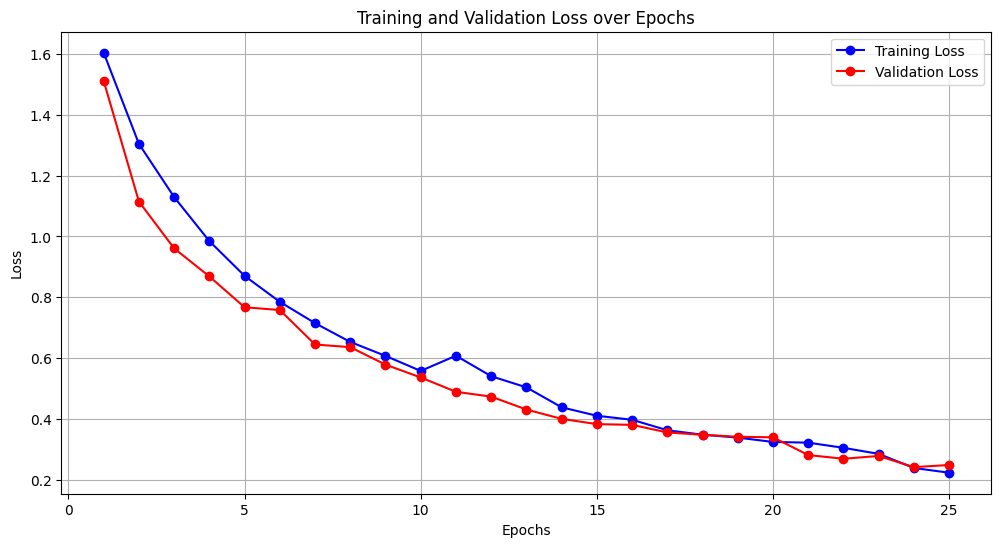

In [ ]:
# Plot Loss Curves
plt.figure(figsize=(12, 6))
epochs = range(1, 26)

plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

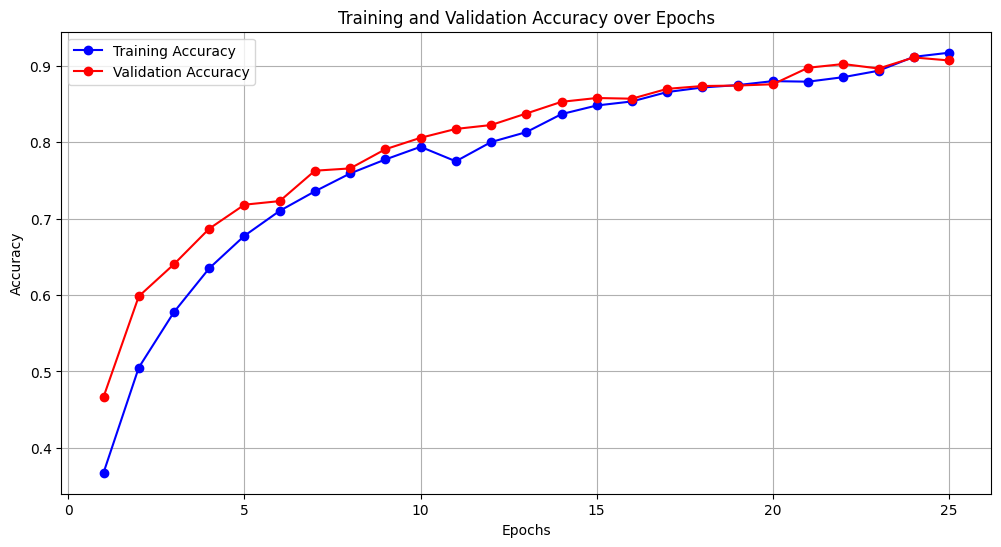

In [ ]:
# Plot Accuracy Curves
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
from tqdm.notebook import tqdm

# Make sure the model is in eval mode
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Generating Predictions"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


Generating Predictions:   0%|          | 0/1562 [00:00<?, ?it/s]

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import os

# The correct root path to the dataset
test_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

# Test paths pointing directly to the test_set folders inside each crop
test_paths = [
    os.path.join(test_dir, 'Cassava', 'test_set'),
    os.path.join(test_dir, 'Cashew', 'test_set'),
    os.path.join(test_dir, 'Maize', 'test_set'),
    os.path.join(test_dir, 'Tomato', 'test_set'),
]

transform_test = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the test datasets correctly
test_datasets = [datasets.ImageFolder(root=path, transform=transform_test) for path in test_paths]
combined_test_dataset = ConcatDataset(test_datasets)

# Create DataLoader
test_loader = DataLoader(combined_test_dataset, batch_size=16, shuffle=False)

print(f"✅ Test samples: {len(combined_test_dataset)}")

# Get class names globally from all subfolders
all_class_names = []
for ds in test_datasets:
    all_class_names.extend(ds.classes)

# Remove duplicates while keeping order
from collections import OrderedDict
all_class_names = list(OrderedDict.fromkeys(all_class_names))
print(len(all_class_names))

print(f"✅ Test classes: {all_class_names}")


✅ Test samples: 24981
18
✅ Test classes: ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic', 'anthracnose', 'gumosis', 'leaf miner', 'red rust', 'fall armyworm', 'grasshoper', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']


In [ ]:
import os

# Test directories
test_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

crops = ['Cassava', 'Cashew', 'Maize', 'Tomato']

for crop in crops:
    crop_test_dir = os.path.join(test_dir, crop, 'test_set')
    print(f"\n🌾 Crop: {crop}")
    for disease_class in os.listdir(crop_test_dir):
        class_path = os.path.join(crop_test_dir, disease_class)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f" - {disease_class}: {num_images} images")



🌾 Crop: Cassava
 - bacterial blight: 2623 images
 - green mite: 1020 images
 - healthy: 1184 images
 - brown spot: 1483 images
 - mosaic: 1200 images

🌾 Crop: Cashew
 - healthy: 1336 images
 - leaf miner: 1487 images
 - gumosis: 425 images
 - red rust: 1815 images
 - anthracnose: 1838 images

🌾 Crop: Maize
 - leaf spot: 1261 images
 - streak virus: 1004 images
 - leaf beetle: 950 images
 - leaf blight: 1004 images
 - healthy: 211 images
 - fall armyworm: 284 images
 - grasshoper: 411 images

🌾 Crop: Tomato
 - verticulium wilt: 764 images
 - leaf blight: 1309 images
 - healthy: 500 images
 - leaf curl: 532 images
 - septoria leaf spot: 2340 images


In [ ]:
import os
import shutil

# Original test directories for each crop
base_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented"

crops = ['Cassava', 'Cashew', 'Maize', 'Tomato']

# New unified directory
unified_test_dir = "/root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Unified Test Set"

# Create the unified directory if it doesn't exist
os.makedirs(unified_test_dir, exist_ok=True)
print(f"✅ Created unified test directory: {unified_test_dir}")

# Move all class folders from each crop's test_set to the unified directory
for crop in crops:
    crop_test_dir = os.path.join(base_dir, crop, 'test_set')
    for class_name in os.listdir(crop_test_dir):
        src_path = os.path.join(crop_test_dir, class_name)
        dst_path = os.path.join(unified_test_dir, class_name)

        if not os.path.exists(dst_path):
            shutil.move(src_path, dst_path)
            print(f"✅ Moved {src_path} ➡️ {dst_path}")
        else:
            print(f"⚠️ {dst_path} already exists. Skipping.")

print("🎉 All folders moved successfully!")

✅ Created unified test directory: /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Unified Test Set
✅ Moved /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Cassava/test_set/bacterial blight ➡️ /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Unified Test Set/bacterial blight
✅ Moved /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Cassava/test_set/green mite ➡️ /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset for Crop Pest and Disease Detection/CCMT Unified Test Set/green mite
✅ Moved /root/.cache/kagglehub/datasets/stephenazongo/ghana-crop-disease-dataset/versions/1/Dataset fo

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_test = transforms.Compose([
    transforms.Resize((380, 380)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

test_dataset = datasets.ImageFolder(
    root=unified_test_dir,
    transform=transform_test
)

test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"✅ Unified Test samples: {len(test_dataset)}")
print(f"✅ Unified Test classes: {test_dataset.classes}")

✅ Unified Test samples: 21625
✅ Unified Test classes: ['anthracnose', 'bacterial blight', 'brown spot', 'fall armyworm', 'grasshoper', 'green mite', 'gumosis', 'healthy', 'leaf beetle', 'leaf blight', 'leaf curl', 'leaf miner', 'leaf spot', 'mosaic', 'red rust', 'septoria leaf spot', 'streak virus', 'verticulium wilt']


In [ ]:
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Generating Predictions"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

Generating Predictions:   0%|          | 0/1352 [00:00<?, ?it/s]

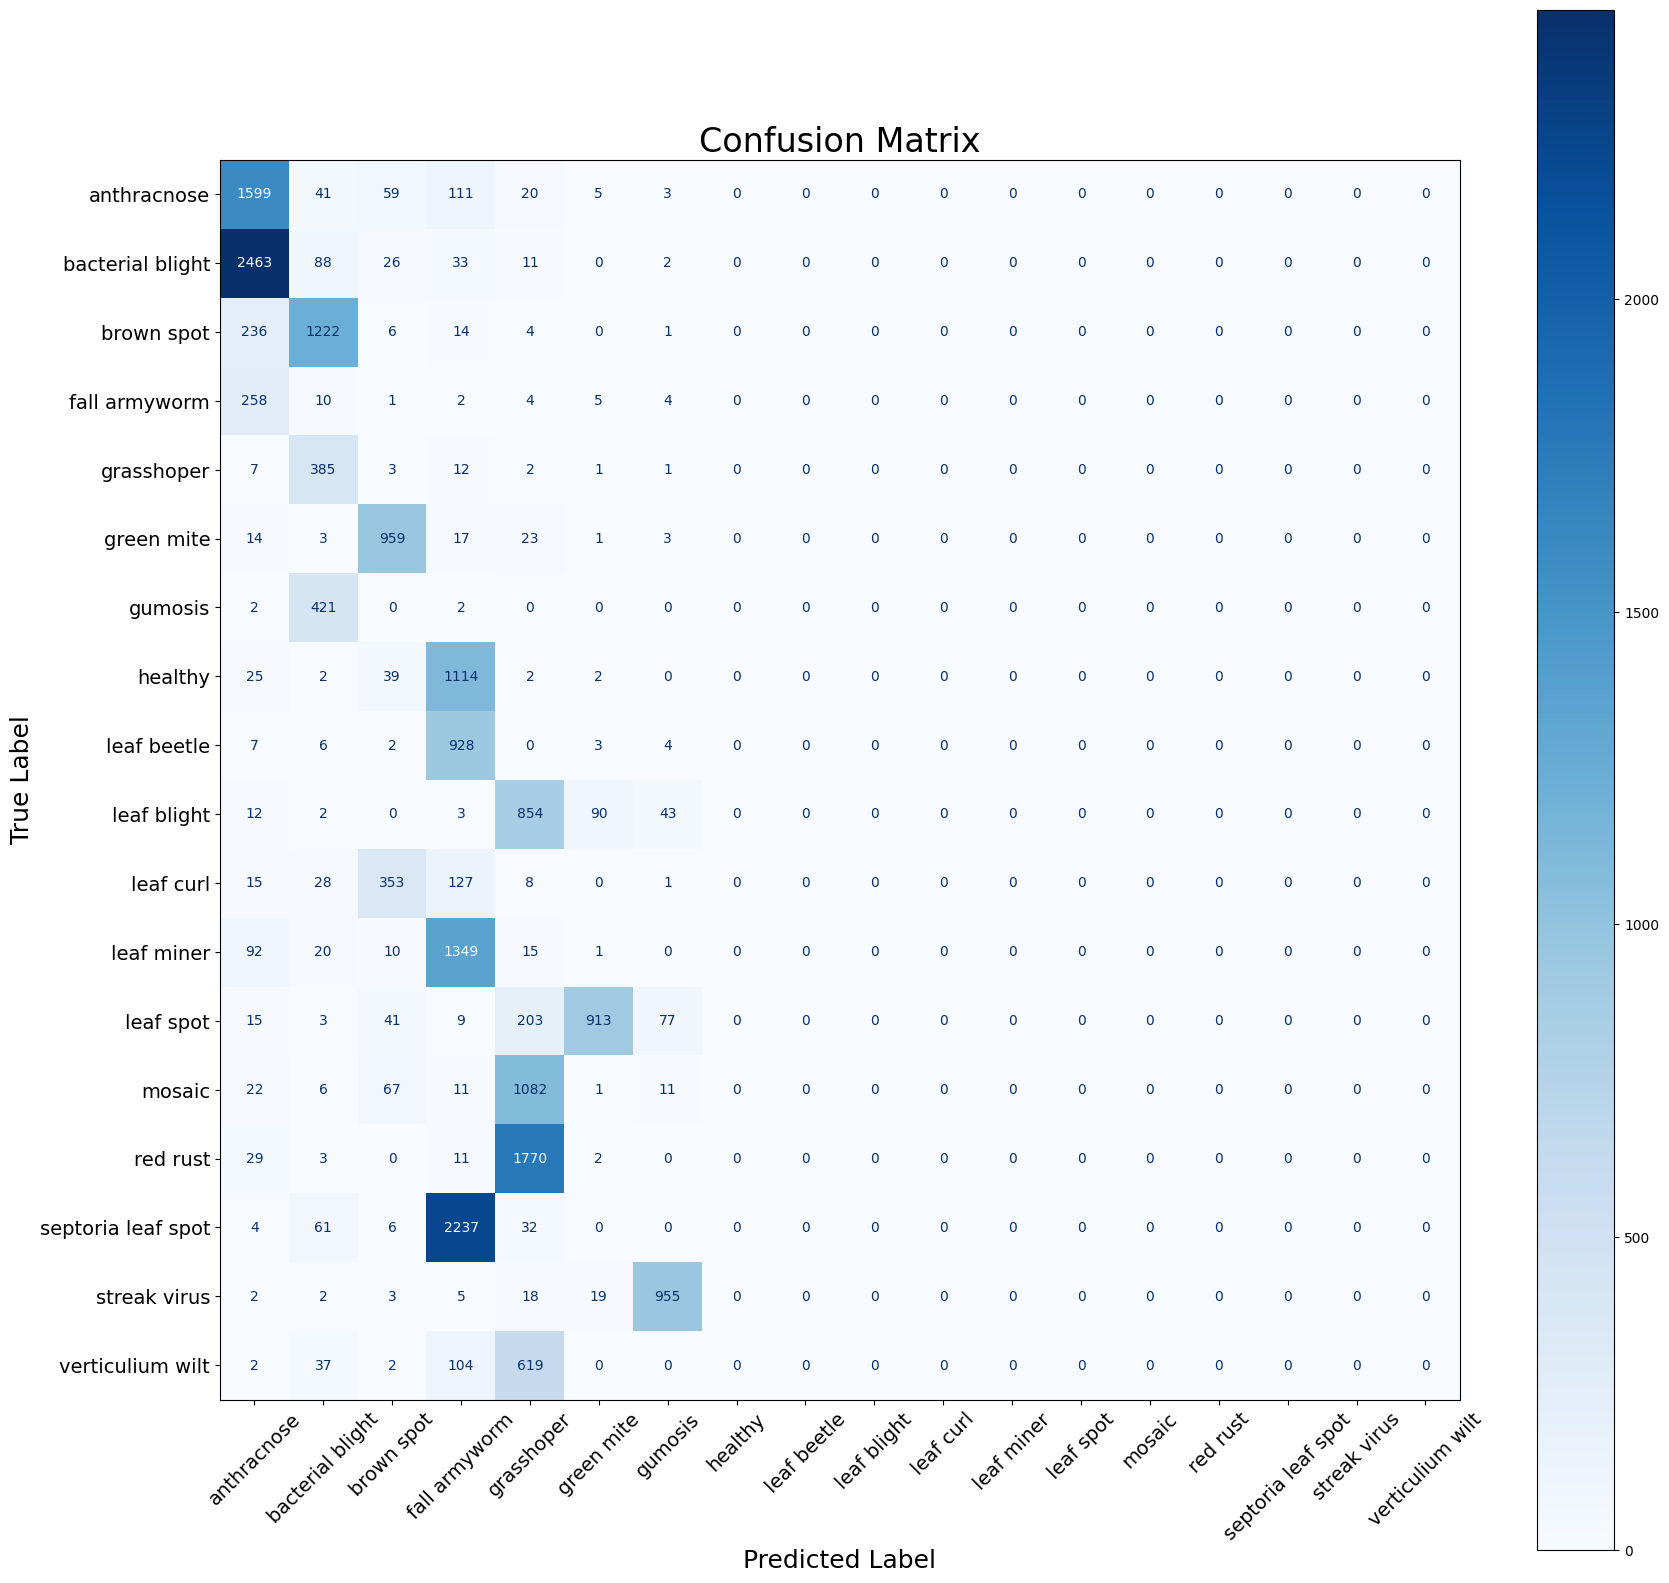

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
fig, ax = plt.subplots(figsize=(20, 20))  # Bigger figure for more spacing

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)

disp.plot(
    cmap=plt.cm.Blues,
    xticks_rotation=45,  # Slightly rotated for better readability
    values_format='d',
    ax=ax
)

plt.title('Confusion Matrix', fontsize=24)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)

plt.show()